## Problem 3

 1. Use the simplejson library to load the data in stats/asst2.data.txt.
 2. Interpret this data as a list of 1000 $x$-coordinates, followed by the corresponding list of 1000 $y$-coordinates. 
 3. Fit the data using the functions $f_1 = 1$, $f_2 = x$, $f_3 = x^2$, $f_4 = sin(x)$, $f_5 = sin(2x)$, $f_6 = sin(3x)$, using least-squares interpolation.  Print out the coefficients of each function.
 4. Compute the 1st, 2nd, 3rd and 4th moments of the data about the fitted curve.  
 5. Plot the data together with your fitted curve. 

Populating the interactive namespace from numpy and matplotlib


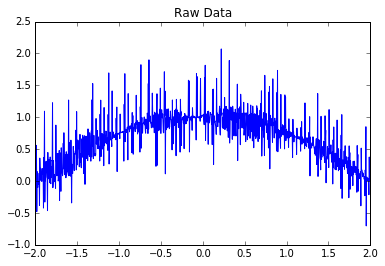

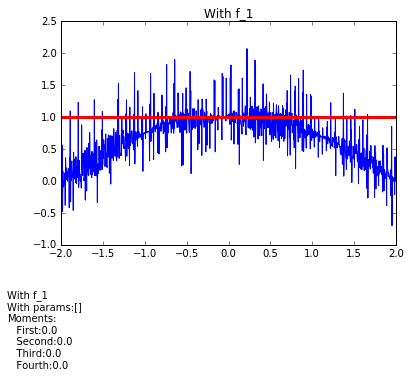

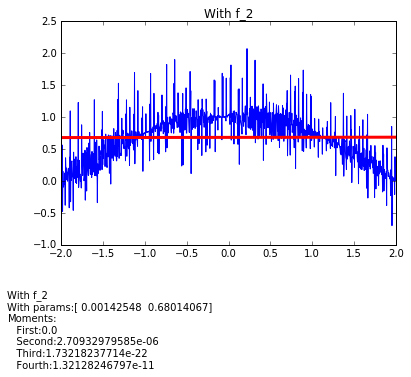

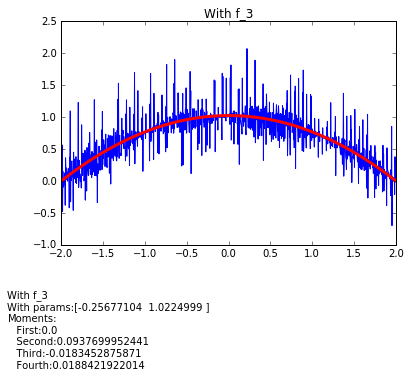

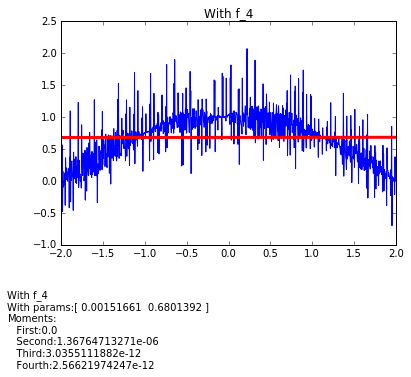

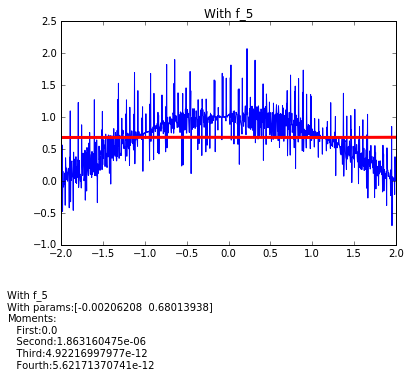

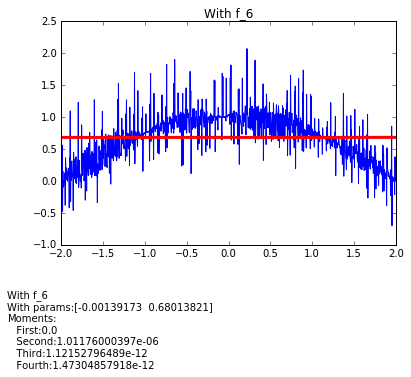

In [122]:
% pylab inline
import simplejson
from scipy.optimize import curve_fit
from scipy.stats import moment
import inspect

def p3(title_content, func):
    figure()
    if len(inspect.signature(func).parameters) != 1:
        opt_params, _ = curve_fit(func, data_x, data_y)
    else:
        opt_params = []
    plot(data_x, data_y)
    title(title_content)
    processed = [func(x, *opt_params) for x in data_x]
    plot(data_x, processed, color= "red", linewidth = 3)
    moments = [moment(processed, 1), moment(processed, 2), moment(processed, 3), moment(processed, 4)]
    figtext(0, -.3, title_content + "\nWith params:" + str(opt_params) + "\nMoments:" + "\n   First:" + str(moments[0]) + "\n   Second:" + str(moments[1]) + "\n   Third:" + str(moments[2]) + "\n   Fourth:" + str(moments[3]))
    show()

# Renamed `asst2.data.txt` to `data.json`
data_x, data_y = simplejson.load(open("data.json"))
figure()
title("Raw Data")
plot(data_x, data_y)

def f_1(x):
    return 1
p3("With f_1", f_1)

def f_2(x, a, b):
    return a * x + b
p3("With f_2", f_2)

def f_3(x, a, b):
    return a * x**2 + b
p3("With f_3", f_3)

def f_4(x, a, b):
    return a * sin(x) + b
p3("With f_4", f_4)

def f_5(x, a, b):
    return a * sin(2*x) + b
p3("With f_5", f_5)

def f_6(x, a, b):
    return a * sin(3*x) + b
p3("With f_6", f_6)